In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import csv


filnavn = "sikkerheit_utf8.csv" # filen min


df = pd.read_csv(filnavn, delimiter=";", encoding="utf-8", on_bad_lines='skip') # https://stackoverflow.com/questions/18039057/pandas-parser-cparsererror-error-tokenizing-data

print(df.head())


          Timestamp Source IP Address Destination IP Address  Source Port  \
0  30.05.2023 06:33     103.216.15.12           84.9.164.252        31225   
1  26.08.2020 07:08    78.199.217.198         66.191.137.154        17245   
2  13.11.2022 08:23      63.79.210.48          198.219.82.17        16811   
3  02.07.2023 10:38     163.42.196.10        101.228.192.255        20018   
4  16.07.2023 13:11     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken  \
0  Qui natus odio asperiores n

In [67]:

protocol_counts = df['Protocol'].value_counts()
print(f"protocol counts:\n{protocol_counts}\n")


protocol counts:
Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64



The attack types are: ['Malware' 'DDoS' 'Intrusion']
DDoS attacks utgjør 33.57% av totalen


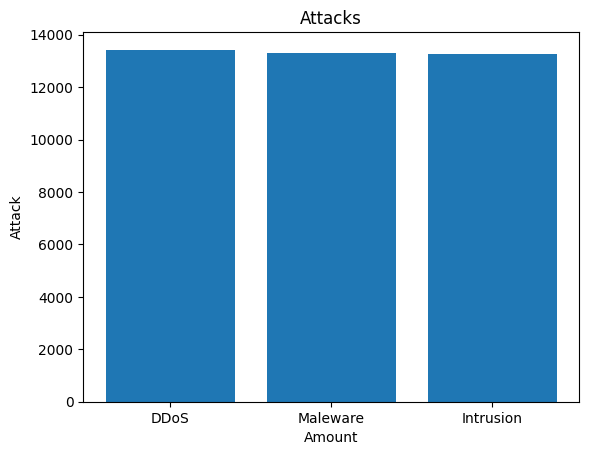

In [68]:
attack_types = df['Attack Type'].unique() #Finner hver unique og lager en liste
print(f"The attack types are: {attack_types}") #printer listen



DDoS_count = (df['Attack Type'] == 'DDoS').sum() # Bare DDoS
total_attacks = df['Attack Type'].count() # teller mengde attacks

DDoS_percent = DDoS_count/total_attacks *100 # Omgjør dette til en prosent

print(f"DDoS attacks utgjør {DDoS_percent}% av totalen") #printer det vi fant


Maleware_count = (df['Attack Type'] == 'Malware').sum() # Bruker samme metode for summering, bare for de andre "attack types"
Intrustion_count = (df['Attack Type'] == 'Intrusion').sum()

plt.title('Attacks')
plt.ylabel('Attack')
plt.xlabel('Amount')
plt.bar(['DDoS', 'Maleware', 'Intrusion'], [DDoS_count, Maleware_count, Intrustion_count])
plt.show()

In [ ]:
# Ideen fra: https://stackoverflow.com/questions/67812657/how-can-i-show-a-specific-word-in-a-data-set
windows_count = 0
windows_total = []
windows_lista = {'Windows'}

for line in df['Device Information']:
   found = False
   for word in windows_lista:
      if line.find(word) != -1:
         found = True
         windows_total.append(word)
         break
   if not found:
      windows_total.append("None")

for word in windows_total:
   if word == 'Windows':
      windows_count += 1



17953


In [73]:
macintosh_count = 0
macintosh_total = []
macintosh_lista = {'Macintosh'}

for line in df['Device Information']:
   found = False
   for word in macintosh_lista:
      if line.find(word) != -1:
         found = True
         macintosh_total.append(word)
         break
   if not found:
      macintosh_total.append("None")

for word in macintosh_total:
   if word == 'Macintosh':
      macintosh_count += 1

if windows_count > macintosh_count:
    print(f"Operativ systemet som blir angrepet mest er: Windows")
else:
    print(f"Operativ systemet som blir angrepet mest er: Macintosh")

Operativ systemet som blir angrepet mest er: Windows


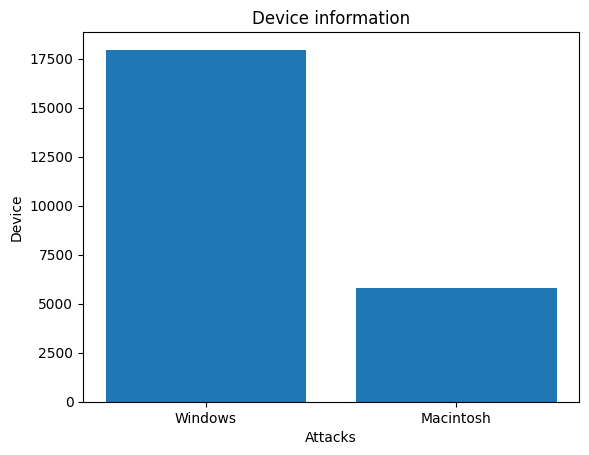

In [ ]:
plt.title('Device information')
plt.ylabel('attacks')
plt.xlabel('Device')
plt.bar(['Windows', 'Macintosh'], [windows_count, macintosh_count])
plt.show()